In [43]:
import pandas as pd

file_path = '../dataset/'

train_df = pd.read_csv(file_path + 'train.csv')

experiment_df_list = []
n_experiment = 10

for i in range(1, n_experiment + 1):
    if i < 10:
        experiment_df_list.append(pd.read_csv(file_path + 'experiment_0' + str(i) + '.csv'))
    else:
        experiment_df_list.append(pd.read_csv(file_path + 'experiment_' + str(i) + '.csv'))

for i in range(len(experiment_df_list)):
    print("Experiment {} total length: {}".format(i + 1, len(experiment_df_list[i])))

Experiment 1 total length: 1055
Experiment 2 total length: 1668
Experiment 3 total length: 1521
Experiment 4 total length: 532
Experiment 5 total length: 462
Experiment 6 total length: 1296
Experiment 7 total length: 565
Experiment 8 total length: 605
Experiment 9 total length: 740
Experiment 10 total length: 1301


In [44]:
worn_df = pd.DataFrame()
unworn_df = pd.DataFrame()

for i in range(len(experiment_df_list)):
    temp_df = experiment_df_list[i].iloc[:, :43]

    for col in experiment_df_list[i].columns:
        if all(experiment_df_list[i][col] == 0.0):
            temp_df = temp_df.drop(labels=col, axis = 1)

    if train_df.iloc[i, 4] == 'worn':
        print("Experiment {} -> worn".format(i + 1))
        temp_df['worn'] = 1
        worn_df = pd.concat([worn_df, temp_df], axis = 0)

    elif train_df.iloc[i, 4] == 'unworn':
        print("Experiment {} -> unworn".format(i + 1))
        temp_df['worn'] = 0
        unworn_df = pd.concat([unworn_df, temp_df], axis = 0)

print("Worn experiment total length: {}".format(len(worn_df)))
print("Unworn experiment total length: {}".format(len(unworn_df)))


Experiment 1 -> unworn
Experiment 2 -> unworn
Experiment 3 -> unworn
Experiment 4 -> unworn
Experiment 5 -> unworn
Experiment 6 -> worn
Experiment 7 -> worn
Experiment 8 -> worn
Experiment 9 -> worn
Experiment 10 -> worn
Worn experiment total length: 4507
Unworn experiment total length: 5238


In [33]:
# CNC 공구 마모 여부에 따른 데이터에 대해 각 column 별로 분포를 확인할 수 있는 시각화 자료 1
# 공구 마모 o (i.e., worn_df)

import matplotlib.pyplot as plt

worn_df.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,worn
count,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,...,4507.000000,4507.000000,4507.000000,4.507000e+03,4507.000000,4.507000e+03,4507.000000,4507.000000,4507.000000,4507.0
mean,160.362769,-0.478782,2.822032,160.355447,-0.486692,-1.253606,-0.761420,0.068688,325.591302,10.260260,...,-0.364323,-280.156734,31.259263,5.990681e-01,12.785799,5.640905e-01,322.013535,69.537149,0.106612,1.0
std,21.406512,8.631671,135.625677,21.404691,8.644390,118.569903,4.472576,0.043482,1.651183,11.065234,...,32.079070,1112.665944,26.197978,7.717587e+00,11.504268,4.971500e-01,4.773572,58.242709,0.091656,0.0
min,141.000000,-20.300000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.200000,0.014500,320.000000,0.076300,...,-150.000000,-2150.000000,0.000000,-9.540000e-07,-8.280000,2.710000e-19,300.000000,0.000000,-0.002800,1.0
25%,142.000000,-0.225000,-31.300000,142.000000,0.000000,0.000000,-3.815000,0.031700,324.000000,1.910000,...,-12.250000,-1000.000000,0.000000,0.000000e+00,0.213000,2.790000e-19,318.000000,0.000000,0.000000,1.0
50%,152.000000,0.000000,0.000000,152.000000,0.000000,0.000000,-1.100000,0.056700,325.000000,4.620000,...,0.000000,-332.000000,53.300000,0.000000e+00,17.200000,8.220000e-01,321.000000,116.000000,0.156000,1.0
75%,162.000000,0.125000,31.300000,162.000000,0.000000,0.000000,1.700000,0.099800,327.000000,14.800000,...,9.840000,383.000000,53.300000,0.000000e+00,22.100000,9.570000e-01,327.000000,119.000000,0.183000,1.0
max,198.000000,50.300000,1440.000000,198.000000,50.000000,1000.000000,24.400000,0.365000,329.000000,75.400000,...,128.000000,2150.000000,53.300000,1.000000e+02,70.100000,3.040000e+00,328.000000,129.000000,0.533000,1.0


In [4]:
# CNC 공구 마모 여부에 따른 데이터에 대해 각 column 별로 분포를 확인할 수 있는 시각화 자료 2
# 공구 마모 x (i.e., unworn_df)

import matplotlib.pyplot as plt

unworn_df.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,worn
count,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5238.000000,5.238000e+03,5238.000000,5238.000000,...,5238.000000,5238.000000,5238.000000,5.238000e+03,5238.000000,5.238000e+03,5238.000000,5238.000000,5238.000000,5238.0
mean,170.928026,-0.322168,2.803666,170.931271,-0.311994,0.894893,-0.433103,5.274296e-02,326.835433,7.278585,...,0.112664,-63.458627,26.348435,5.345552e-01,10.513985,4.660950e-01,324.103666,58.418737,0.088200,0.0
std,24.008447,6.612358,104.130858,24.013193,6.631079,86.501002,3.988959,4.674771e-02,1.495467,9.469569,...,26.053652,1105.785140,26.605691,7.292456e+00,11.554730,4.904677e-01,5.034589,58.952649,0.090886,0.0
min,141.000000,-20.400000,-1190.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,...,-106.000000,-2150.000000,0.000000,-9.540000e-07,-6.270000,0.000000e+00,290.000000,0.000000,-0.002010,0.0
25%,149.000000,-0.125000,-12.500000,149.000000,0.000000,0.000000,-3.060000,1.800000e-02,326.000000,0.691250,...,-1.310000,-1160.000000,0.000000,0.000000e+00,0.054000,2.750000e-19,320.000000,0.000000,0.000000,0.0
50%,161.000000,0.000000,0.000000,161.000000,0.000000,0.000000,-0.321000,4.360000e-02,326.000000,3.200000,...,0.000000,206.000000,0.000000,0.000000e+00,1.895000,2.780000e-19,323.000000,0.000000,0.000445,0.0
75%,198.000000,0.025000,12.500000,198.000000,0.000000,0.000000,1.120000,8.940000e-02,328.000000,12.900000,...,1.560000,905.000000,53.300000,0.000000e+00,21.200000,9.260000e-01,329.000000,118.000000,0.177000,0.0
max,198.000000,50.700000,1440.000000,198.000000,50.000000,1000.000000,25.800000,3.800000e-01,330.000000,73.800000,...,150.000000,2150.000000,53.300000,1.000000e+02,75.400000,3.150000e+00,332.000000,130.000000,0.568000,0.0


In [45]:
# 향후 텐서 변환 및 모델 네크워크를 device를 기반으로 하여 생성
import torch

print ("PyTorch version:[%s]."%(torch.__version__))

if torch.cuda.is_available():
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(device)

PyTorch version:[1.12.1].
cuda:0


In [46]:
# worn_df 및 unworn_df를 기반으로 한 학습 데이터 생성
# 데이터 배치 처리, 스케일링, 셔플링 등을 포함한 데이터 전처리 과정 
import torch
from torch.utils.data import DataLoader, Dataset, Subset,TensorDataset
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import random


def Data_scaling(worn, unworn):
    scaler = MinMaxScaler()

    # worn_df 스케일링
    scaler.fit(worn_df)
    worn_scaled = scaler.transform(worn_df)

    # 40번째 칼럼을 1로 설정
    worn_tensor = torch.tensor(worn_scaled, dtype=torch.float32)
    worn_tensor[:, 39] = 1  # 40번째 칼럼 
    # unworn_df 스케일링
    scaler.fit(unworn_df)
    unworn_scaled = scaler.transform(unworn_df) 
    # 40번째 칼럼을 0으로 설정
    unworn_tensor = torch.tensor(unworn_scaled, dtype=torch.float32)
    unworn_tensor[:, 39] = 0  # 40번째 칼럼 
    # 두 DataFrame을 합치기
    mix_tensor = torch.cat((worn_tensor, unworn_tensor), dim=0) 
    random_indices = torch.randperm(mix_tensor.size(0))
    shuffled_tensor = mix_tensor[random_indices]
    
    print("worn_tensor : ",len(worn_tensor.data))
    print("unworn_tensor : ",len(unworn_tensor.data))
    print("mix_tensor : ",len(mix_tensor.data))
    print("shuffled_tensor : ",len(shuffled_tensor.data))
    
    return worn_tensor, unworn_tensor, mix_tensor, shuffled_tensor

def Data_Isolation(tensor, batch_size):
    target = tensor[:, 39]  # 마지막 열을 타겟으로 설정
    data = tensor[:, :39]  # 마지막 열을 제외한 데이터
    
    # 시퀀스 및 타겟 생성
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(target[i + sequence_length])

    # 텐서로 변환
    sequences_tensor = torch.stack(sequences)
    targets_tensor = torch.tensor(targets).float().view(-1, 1)  # 타겟 텐서 변환

    # TensorDataset 생성
    dataset = TensorDataset(sequences_tensor, targets_tensor)
    dataset_size = len(dataset) 
    
    if tensor is worn_tensor:
        train_dataset = TensorDataset(sequences_tensor[:4046], targets_tensor[:4046])  # 0~4045
        test_dataset = TensorDataset(sequences_tensor[4046:], targets_tensor[4046:])  # 4046~4507

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    elif tensor is unworn_tensor:
        train_dataset = TensorDataset(sequences_tensor[:3937], targets_tensor[:3937])  # 0~3937
        test_dataset = TensorDataset(sequences_tensor[3938:], targets_tensor[3938:])  # 3938~5238

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    else:
    # 테스트 데이터 인덱스 설정
        test_indices = list(range(4046, 4508)) + list(range(8444, min(9746, dataset_size)))
        train_indices = list(set(range(dataset_size)) - set(test_indices))

        # 훈련 및 테스트 데이터셋 생성
        train_dataset = Subset(dataset, train_indices)
        test_dataset = Subset(dataset, test_indices)

        # 데이터 로더 생성
        batch_size = 32  # 원하는 배치 크기로 설정
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    print(f"tensor : ", len(tensor.data))

    # 결과 확인
    print( "Train :",len(train_loader.dataset))
    print( "Test",len(test_loader.dataset) )
    return train_loader, test_loader
 

In [47]:
# pytorch 기반 LSTM 모델 구현

import torch.nn as nn
import torch
from torch.utils.data import Dataset 
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import random

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_p):
        super(LSTM, self).__init__()  # LSTM 클래스 초기화
        self.n_layers = num_layers
        self.hidden_dim = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout_p)  # LSTM 레이어
        self.dropout = nn.Dropout(dropout_p)  # 드롭아웃 레이어
        self.affine = nn.Linear(hidden_size, hidden_size)  # Affine 레이어
        self.fc = nn.Linear(hidden_size, output_size, bias=True)  # 최종 출력 레이어
        
        # 가중치 초기화
        self.init_weights()

    def init_weights(self):
        # RNN 가중치 초기화
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.kaiming_normal_(param)  # Kaiming 초기화
            elif 'bias' in name:
                nn.init.zeros_(param)  # 편향은 0으로 초기화

    def forward(self, x):
        # Forward pass
        lstm_out, (hidden, cell) = self.lstm(x)  # (batch_size, seq_length, hidden_size)
        last_out = lstm_out[:, -1, :]  # 마지막 시퀀스의 출력 (batch_size, hidden_size)
        out = self.dropout(last_out)  # Dropout 적용 
        out = self.fc(out)  # 최종 출력 레이어
        #out = nn.functional.softmax(out, dim=1)  # Softmax 적용
        return out  # (batch_size, output_size)
    def predict(self, x):
        with torch.no_grad():
            x = self.forward(x)
        return x
    
    def reset_state(self):
        self.hidden = None  # hidden state 초기화

In [48]:
# 파라미터
input_size = 39  # 입력 피처 수 (특징의 수)
hidden_size = 4  # 은닉층의 크기 (실험을 통해 조정할 수 있음)
output_size = 1  # 출력 클래스 수 (이진 분류의 경우 1)
num_layers = 4  # RNN 층의 수
batch_size = 25
n_epoch = 100  # 훈련 반복 횟수
learning_rate = 0.001  # 학습률
sequence_length = 15  # 시퀀스 길이
dropout_p = 0.5

In [49]:
worn_tensor, unworn_tensor, mix_tensor, shuffled_tensor = Data_scaling(worn_df, unworn_df)

train_loader, test_loader = Data_Isolation(mix_tensor, batch_size)

worn_tensor :  4507
unworn_tensor :  5238
mix_tensor :  9745
shuffled_tensor :  9745
tensor :  9745
Train : 7982
Test 1748


In [50]:
# LSTM 모델 학습

model = LSTM(input_size, hidden_size, output_size, num_layers,dropout_p)  # 모델 초기화
criterion = nn.BCEWithLogitsLoss()  # 이진 분류를 위한 손실 함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # Adam 옵티마이저

train_acc_list = []
train_loss_list = []  # 손실을 저장할 리스트
test_loss_list = []  # 테스트 손실을 저장할 리스트
accuracy_list = []  # 테스트 정확도를 저장할 리스트
perplexity_list = []  # 퍼플렉서티를 저장할 리스트 추가

# 모델 학습
model.train()  # 모델을 훈련 모드로 설정
for epoch in range(n_epoch):
    total_loss = torch.tensor(0.0)  # 텐서로 초기화
    loss_count = 0
    correct = 0  # 훈련 정확도 계산을 위한 변수
    
    for batch_x, batch_t in train_loader:  # DataLoader에서 배치 가져오기
        optimizer.zero_grad()  # 기울기 초기화
        output = model(batch_x)  # Forward pass
        loss = criterion(output, batch_t)  # 손실 계산
        loss.backward()  # Backward pass
        optimizer.step()  # 매개변수 업데이트

        total_loss += loss  # 텐서로 누적
        loss_count += 1

        # 훈련 정확도 계산
        preds = torch.sigmoid(output)  # logits를 확률로 변환
        preds = (preds > 0.5).float()  # 0.5를 기준으로 이진 분류
        correct += (preds.eq(batch_t).sum().item())  # 정확도 계산

    # 평균 손실
    avg_loss = total_loss / loss_count  # 평균 손실
    ppl = torch.exp(avg_loss)  # 퍼플렉서티 계산
    perplexity_list.append(ppl.item())  # 퍼플렉서티 저장
    print('| 에폭 %d | 퍼플렉서티 %.2f' % (epoch + 1, ppl.item()))  # .item()으로 값 추출
     
    # 훈련 정확도 계산
    train_accuracy = correct / len(train_loader.dataset)  # 훈련 정확도
    train_acc_list.append(train_accuracy)  # 훈련 정확도 저장
    print('훈련 정확도: %.2f%%' % (train_accuracy * 100))
    
    # 모델 평가
    model.eval()  # 모델을 평가 모드로 설정
    test_loss = 0
    correct = 0
    
    with torch.no_grad():  # 평가 시 기울기 계산 비활성화
        for batch_x, batch_t in test_loader:
            output = model(batch_x)  # Forward pass 
            loss = criterion(output, batch_t)  # 손실 계산
            test_loss += loss.item()

            preds = torch.sigmoid(output)  # logits를 확률로 변환
            preds = (preds > 0.5).float()  # 0.5를 기준으로 이진 분류
            correct += (preds.eq(batch_t).sum().item())  # 정확도 계산

    # 최종 평가 결과 출력
    test_loss /= len(test_loader)  # 평균 손실
    accuracy = correct / len(test_loader.dataset)  # 정확도 계산
    print('테스트 손실: %.4f' % test_loss)
    print('테스트 정확도: %.2f%%' % (accuracy * 100))

    # 손실과 정확도를 리스트에 저장
    train_loss_list.append(avg_loss.item())
    test_loss_list.append(test_loss)
    accuracy_list.append(accuracy)

# 예측 수행 예시
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    # 예측할 데이터 (예: 첫 번째 테스트 배치)
    sample_batch_x, sample_batch_t = next(iter(test_loader))
    predictions = model.predict(sample_batch_x)  # predict 메서드 사용
    predicted_classes = (torch.sigmoid(predictions) > 0.5).float()  # 이진 분류
    print("예측 결과:", predicted_classes)


| 에폭 1 | 퍼플렉서티 1.99
훈련 정확도: 54.31%
테스트 손실: 0.6152
테스트 정확도: 80.61%
| 에폭 2 | 퍼플렉서티 1.26
훈련 정확도: 95.94%
테스트 손실: 0.0654
테스트 정확도: 99.31%
| 에폭 3 | 퍼플렉서티 1.04
훈련 정확도: 99.80%
테스트 손실: 0.0423
테스트 정확도: 99.26%
| 에폭 4 | 퍼플렉서티 1.02
훈련 정확도: 99.84%
테스트 손실: 0.0428
테스트 정확도: 99.08%
| 에폭 5 | 퍼플렉서티 1.01
훈련 정확도: 99.96%
테스트 손실: 0.0289
테스트 정확도: 99.49%
| 에폭 6 | 퍼플렉서티 1.01
훈련 정확도: 100.00%
테스트 손실: 0.0272
테스트 정확도: 99.49%
| 에폭 7 | 퍼플렉서티 1.01
훈련 정확도: 100.00%
테스트 손실: 0.0270
테스트 정확도: 99.49%
| 에폭 8 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0264
테스트 정확도: 99.49%
| 에폭 9 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0278
테스트 정확도: 99.43%
| 에폭 10 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0280
테스트 정확도: 99.49%
| 에폭 11 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0283
테스트 정확도: 99.49%
| 에폭 12 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0281
테스트 정확도: 99.49%
| 에폭 13 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0292
테스트 정확도: 99.49%
| 에폭 14 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0291
테스트 정확도: 99.49%
| 에폭 15 | 퍼플렉서티 1.00
훈련 정확도: 100.00%
테스트 손실: 0.0302
테스트 정확도: 9

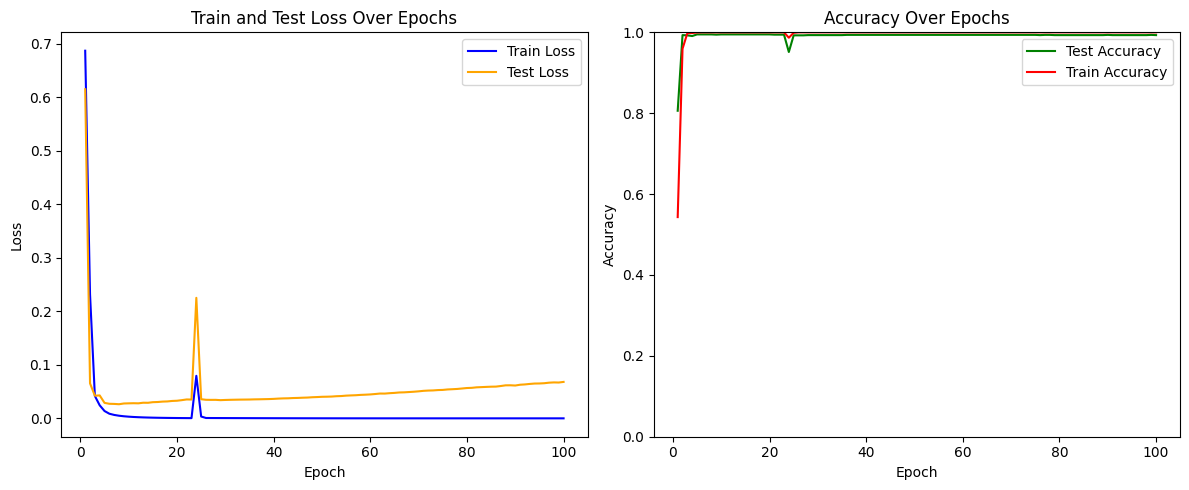

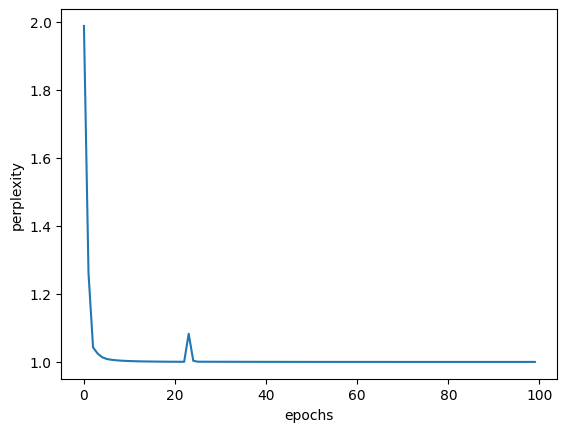

In [51]:
import matplotlib.pyplot as plt

# 그래프 시각화
plt.figure(figsize=(12, 5))

# 훈련 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, n_epoch + 1), train_loss_list, label='Train Loss', color='blue')
plt.plot(range(1, n_epoch + 1), test_loss_list, label='Test Loss', color='orange')
plt.title('Train and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epoch + 1), accuracy_list, label='Test Accuracy', color='green')
plt.plot(range(1, n_epoch + 1), train_acc_list, label='Train Accuracy', color='red')  # 훈련 정확도 추가
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # 정확도 범위 설정
plt.legend()

plt.tight_layout()
plt.show()

# 훈련 손실 그래프
x = range(len(perplexity_list)) 
plt.plot(x, perplexity_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()


In [52]:
torch.save(model, 'model_LSTM.pt')
loaded_model = torch.load('model_LSTM.pt')

In [53]:
loaded_model.eval()


LSTM(
  (lstm): LSTM(39, 4, num_layers=4, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (affine): Linear(in_features=4, out_features=4, bias=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)